In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# The data

In [123]:
def generate_data(n_1, n_2, n_dim=2):
    # Skew the data
    mean_1 = np.array([0, 1])
    al_1 = 70 * 2 * np.pi / 360
    s_11 = 0.2
    s_12 = 1.0
    sigma_1 = np.array([[s_11 * np.cos(al_1), s_12 * np.sin(al_1)], [-s_11 * np.sin(al_1), s_12 * np.cos(al_1)]])

    mean_2 = np.array([1.2, -0.2])
    al_2 = 60 * 2 * np.pi / 360
    s_21 = 0.2
    s_22 = 1.0
    sigma_2 = np.array([[s_21 * np.cos(al_2), s_22 * np.sin(al_2)], [-s_21 * np.sin(al_2), s_22 * np.cos(al_2)]])

    # Generate uniform Gaussian distributions, then rotate and move
    data_1 = np.matmul(sigma_1, np.random.randn(n_1, n_dim, 1)).reshape(-1, n_dim) + mean_1
    data_2 = np.matmul(sigma_2, np.random.randn(n_2, n_dim, 1)).reshape(-1, n_dim) + mean_2
    
    # Dataset: Features and labels
    features = np.concatenate([data_1, data_2])
    labels = np.array([-1] * n_1 + [1] * n_2)

    return features, labels

500 data points in 2 dimensions


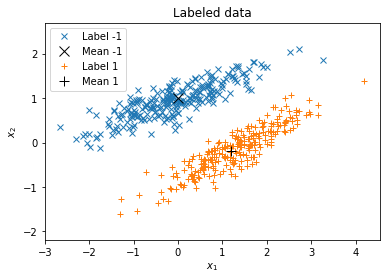

In [128]:
# Seed to get reproducible results
np.random.seed(9235)

# Generate data, 250 per class
features, labels = generate_data(250, 250)

# Plot the dataset
for label, marker, mean, color in zip(np.unique(labels), "x+", [mean_1, mean_2], ["C0", "C1"]):
    class_data = features[labels == label]
    plt.plot(class_data[:, 0], class_data[:, 1], marker, label=f"Label {label}", c=color)
    plt.plot(mean[0], mean[1], f"k{marker}", label=f"Mean {label}", ms=10)

print(f"{features.shape[0]} data points in {features.shape[1]} dimensions")

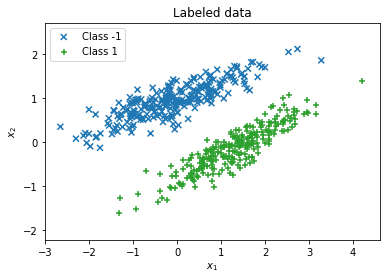

In [148]:
def plot_prediction(features, y_true, y_predicted):
    labels = np.unique(y_true)
    for i, (label, marker) in enumerate(zip(labels, "x+*.")):
        class_data = features[y_true == label]
        # Color is given by the predicted label
        colors = [f"C{predicted - labels.min()}" for predicted in y_predicted[y_true == label]]
        plt.scatter(class_data[:, 0], class_data[:, 1], marker=marker, label=f"Class {label}", c=colors)
    plt.legend()
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.axis("equal")

plt.title("Labeled data")
plot_prediction(features, labels, labels)

Sample training and test set from the data

## LDA

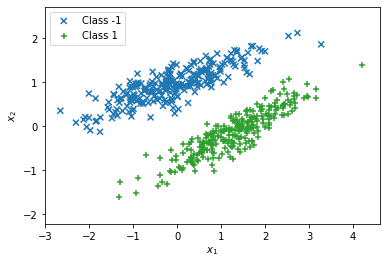

In [149]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(features, labels)

predicted_labels = lda.predict(features)
plot_prediction(features, labels, predicted_labels)

## Mean discrimination

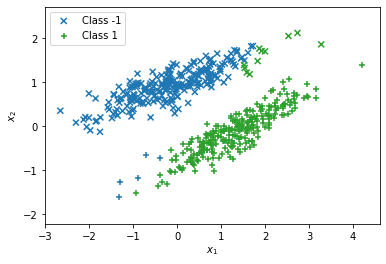

In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
means = [features[labels == -1].mean(axis=0), features[labels == 1].mean(axis=0)] * 20
lda.fit(means, [-1, 1] * 20)

predicted_labels = lda.predict(features)
plot_prediction(features, labels, predicted_labels)